<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/FeatureSelection/FilterMethods/1_7_Information_gain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Information gain - mutual information

Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

As extracted from [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

I will demonstrate how to select features based on mutual information using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [2]:
!pip install --user kaggle
!mkdir .kaggle
import json
token = {"username":"####","key":"#####"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c bnp-paribas-cardif-claims-management
!unzip train.csv.zip





  0% 0.00/162k [00:00<?, ?B/s]
100% 162k/162k [00:00<00:00, 60.9MB/s]
 97% 48.0M/49.4M [00:00<00:00, 39.7MB/s]
100% 49.4M/49.4M [00:00<00:00, 77.8MB/s]
 79% 39.0M/49.4M [00:00<00:00, 35.9MB/s]
100% 49.4M/49.4M [00:00<00:00, 72.1MB/s]
Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [4]:
# load dataset
data = pd.read_csv('train.csv', nrows=50000)
data.shape

(50000, 133)

In [0]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [6]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [7]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.00115198, 0.00376259, 0.0021028 , 0.00580978, 0.00389876,
       0.00730514, 0.0060715 , 0.00398941, 0.02531472, 0.00382227,
       0.01729754, 0.00410407, 0.02190276, 0.00546927, 0.00698981,
       0.00182952, 0.00268688, 0.00587079, 0.00141783, 0.01152996,
       0.        , 0.00833319, 0.00688801, 0.00273175, 0.00170287,
       0.00301399, 0.00397183, 0.00756928, 0.00850403, 0.00579929,
       0.00695341, 0.00286358, 0.00644633, 0.00358314, 0.00708205,
       0.00518723, 0.00696718, 0.0030938 , 0.00580988, 0.00398148,
       0.0058243 , 0.00550992, 0.00298061, 0.03904274, 0.00681155,
       0.00538938, 0.00459796, 0.00220275, 0.00381278, 0.00264295,
       0.00304132, 0.00277539, 0.00555115, 0.01796731, 0.00346292,
       0.00258301, 0.0055244 , 0.00245425, 0.00161655, 0.00554659,
       0.00379221, 0.00512408, 0.00400008, 0.00394685, 0.00612917,
       0.00289201, 0.00138187, 0.00387584, 0.00718362, 0.        ,
       0.00638617, 0.00557069, 0.00473925, 0.        , 0.00481

In [8]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50     0.039043
v10     0.025315
v14     0.021903
v62     0.017967
v12     0.017298
          ...   
v102    0.000000
v115    0.000000
v23     0.000000
v87     0.000000
v83     0.000000
Length: 112, dtype: float64

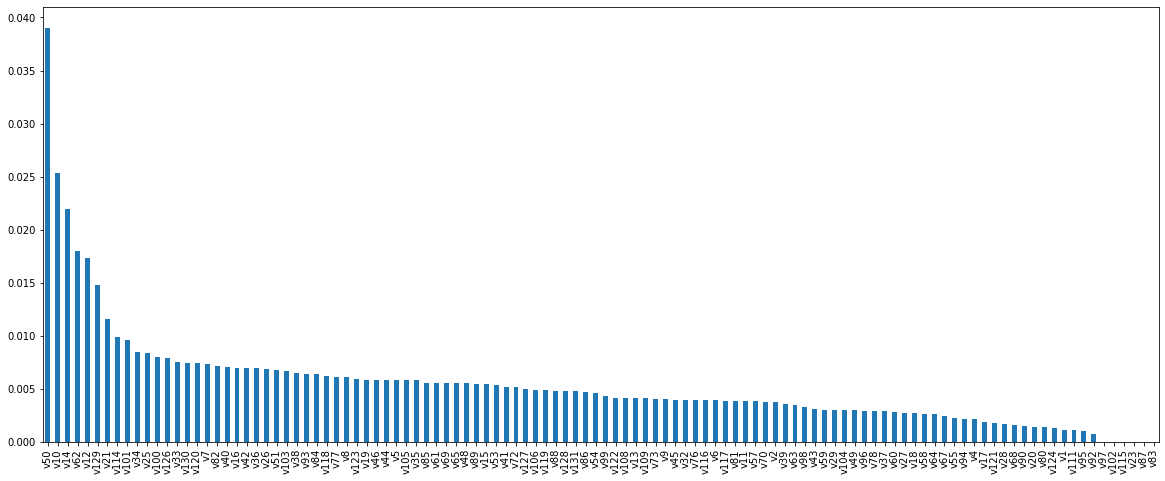

In [9]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Comparatively, we can see that there are a few features (left of the plot) that seem to contribute the most to predicting the target.There are also a few features with almost zero MI values on the right of the plot.

As I explained in the previous lecture, where to put the cut-off to select features is arbitrary. One could choose a certain value of MI after studying the plot above. An alternative and most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the the top 10th percentile of the MI value distribution.

To do this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. SelectKBest allows you to determine how many features, and SelectPercentile the features within a certain percentile. See below.

In [10]:
# here I will select the top 10 features
# which are shown below
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v34', 'v50', 'v62', 'v101', 'v114',
       'v129'],
      dtype='object')

### Regression

In [11]:
# load dataset
data = pd.read_csv('houseprice_train.csv')
data.shape

(1460, 81)

In [12]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [0]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [0]:
# determine the mutual information
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

C:\Users\Sole\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


OverallQual      0.525141
GrLivArea        0.481472
TotalBsmtSF      0.382593
GarageCars       0.369725
GarageArea       0.369349
YearBuilt        0.351175
1stFlrSF         0.312771
GarageYrBlt      0.265837
MSSubClass       0.262575
FullBath         0.260961
YearRemodAdd     0.251298
2ndFlrSF         0.222845
LotFrontage      0.207203
Fireplaces       0.185952
TotRmsAbvGrd     0.182605
OpenPorchSF      0.178707
LotArea          0.166051
BsmtFinSF1       0.162564
OverallCond      0.117834
BsmtUnfSF        0.111998
MasVnrArea       0.100211
HalfBath         0.081581
WoodDeckSF       0.077299
BedroomAbvGr     0.052164
BsmtFullBath     0.035035
ScreenPorch      0.021924
KitchenAbvGr     0.021352
EnclosedPorch    0.010106
PoolArea         0.007475
MiscVal          0.004594
3SsnPorch        0.003181
LowQualFinSF     0.001269
YrSold           0.000000
BsmtHalfBath     0.000000
BsmtFinSF2       0.000000
MoSold           0.000000
Id               0.000000
dtype: float64

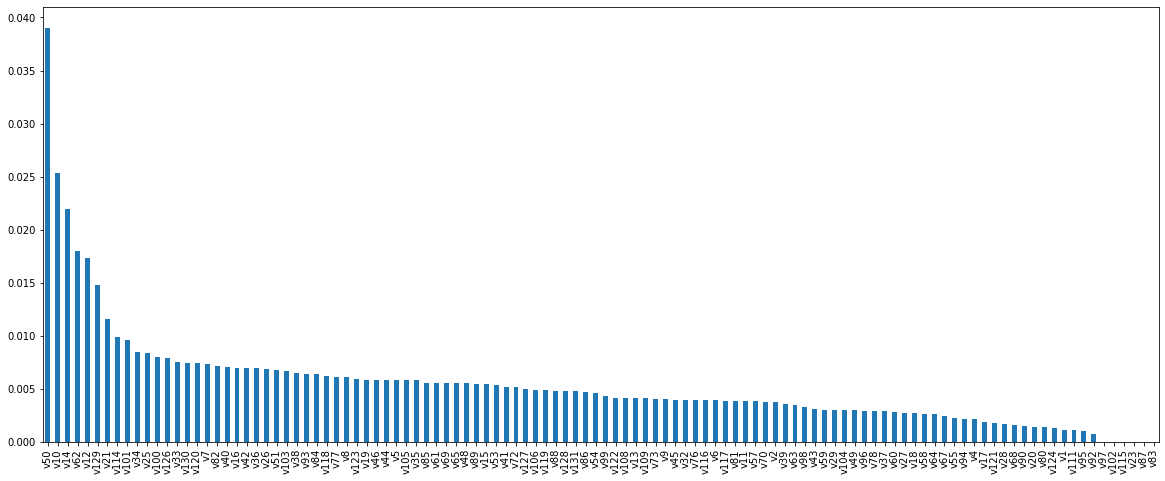

In [14]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [15]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

I have not personally used mutual information in any of my projects. However, there is some value in the method. See for example:

Comparison between univariate and mutual information selection in [sklean website](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

In addition, mutual information has been widely covered, if anything else from a theoretical perspective, in several articles that I share in the additional reading resources section. Therefore I wanted to have it covered in the course, and I leave it up to you to explore it and see if you find any use in it.

That is all for this lecture, I hope you enjoyed it and see you in the next one!